In [37]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
import fileinput
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from scipy.stats.mstats import winsorize


import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/Customer_Data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [12]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [16]:
df.columns = df.columns.str.lower()

In [13]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [18]:
df.shape

(8950, 18)

## PART 1 - DATA PRE-PROCESSING

- Clean and prepare the data. Remember to treat data issues, perform feature scaling, encoding and any other relevant transformations.
- If applicable, use dimensionality reduction and discuss how it impacts the clusters.
- Explain your data preparation process.

- Standardization will most likely be neccessary to handle outliers that that may skew our clustering
    - Will implemenent Principle Component Analysis to :
        - further reduce any potential noise and redundency our dataset may have
        - Deal with multicollinearity with our dataset to prevent distortion between clusters

In [17]:
# Mistake in cash_advance_frequency where max is 1.5, remapped to 1 as the user is a frequent cash advance credit card user
df[df['cash_advance_frequency'] > 1]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
681,C10708,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0,8
1626,C11680,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0,6
2555,C12629,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0,8
2608,C12684,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0,10
3038,C13127,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0,6
3253,C13347,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6
8055,C18273,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0,11
8365,C18588,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0,7


In [19]:
#Standardize all users to frequent max scale 1

df['cash_advance_frequency'] = np.where(df['cash_advance_frequency'] > 1, 1, df['cash_advance_frequency'])
df[df['cash_advance_frequency'] > 1]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure


Checking if frequency scores are consistent given the tenure of the credit card user. Have to keep in mind the dataset is only capturing a 6 month period. Some users have a far longer tenure and therefore frequency may be skewed.

In [20]:
# Checking if frequency scores are consistent given the tenure of the credit card user, s
df[df['cash_advance_trx'] == 0]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.0,0.166667,0.000000,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.00,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.000000,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,1200.0,678.334763,244.791237,0.00,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.0,1.000000,1.000000,1.000000,0.0,0,64,13500.0,6354.314328,198.065894,1.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.0,0.166667,0.166667,0.000000,0.0,0,1,500.0,58.644883,43.473717,0.00,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.0,0.333333,0.333333,0.000000,0.0,0,2,4000.0,0.000000,NaN,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,275.861322,NaN,0.00,6


Thinking purchases and cash advance frequencies can be scaled to percentile

In [21]:
# Only Minimum Payments have a large amount of null values, its less than 3% of the data, going to drop the data
df.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [22]:
#Checking to see significance of null values, Maybe they have no values because they pay their bills earlier where they dont get a minimum payment
df[df['minimum_payments'].isna()]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [23]:
# Dropped customer ID Variable
df.drop('cust_id', axis=1, inplace=True)
df

# note: this was dropped as it is the only categorical value in the dataset and this would be non-useful for clustering

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [24]:
# Turning all null values to 0's
df.dropna(inplace=True)
df.isnull().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

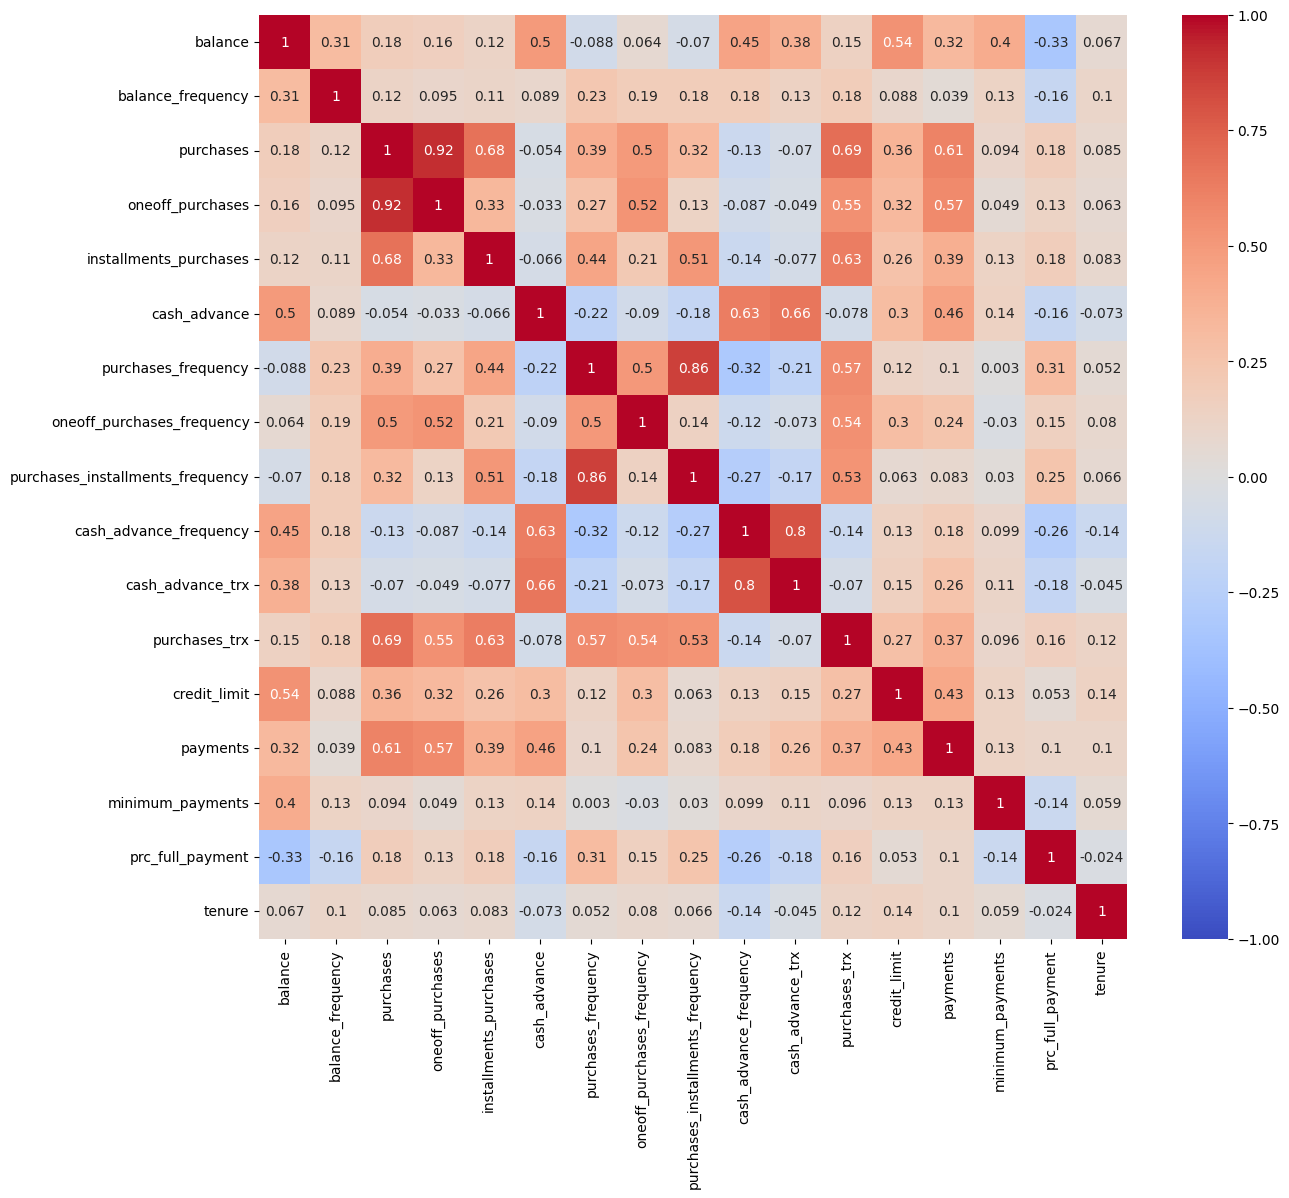

In [28]:
# Correlation Matrix to see potential correlations with each other

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, vmin =-1, vmax =1, cmap='coolwarm')
plt.show()

It seems multiple varaibles are moderately to highly correlated with each other. Dimensionality reduction or PCA may be effective in reducing complexity and redundance within our dataset.

Things to explore about the dataset.

We can observe correlation between:

Purchases
- One-Off purchases (Almost perfectly correlated)
    - May be due to multiple cardholders only making one purchase throughout the entire 6 months
- Installments_Purchases
    - There may be cardholders who's only made one purchase and it is also an installment purchase as well
- Purchase Installments Frequency
- PurchaseTrx


Frequency Variables
- Find out how many purchases allow the classification of a cardholder having a frequency score of 1
- Anything involving both # of transactions/ frequency of transactions and the actual frequency value are highly correlated with each other

Purchase Frequency
- Purchasetrx and purchase frequency is highly correlated

In [30]:
df['tenure'].value_counts().reset_index()

,tenure,count
0,12,7346
1,11,356
2,10,226
3,6,184
4,8,183
5,7,177
6,9,164


In [31]:
#Tenure column have 7 unique values ranging from 6-12

#Change these variables to 12 representing new customers having the credit card for under a month (Tenure by Months)
#12 = 6 months 
#11 = 5 months
#10 = 4 months
#9 = 3 months
#8 = 2 months
#7 = 1 months
#6 = 0 months

tenure_mapping = {
    12: 6,
    11: 5,
    10: 4,
    9: 3,
    8: 2,
    7: 1,
    6: 0
}

df['tenure'] = df['tenure'].replace(tenure_mapping)

df['tenure'].value_counts().reset_index()

,tenure,count
0,6,7346
1,5,356
2,4,226
3,0,184
4,2,183
5,1,177
6,3,164


In [32]:
df['balance'].describe()

count     8636.000000
mean      1601.224893
std       2095.571300
min          0.000000
25%        148.095189
50%        916.855459
75%       2105.195853
max      19043.138560
Name: balance, dtype: float64

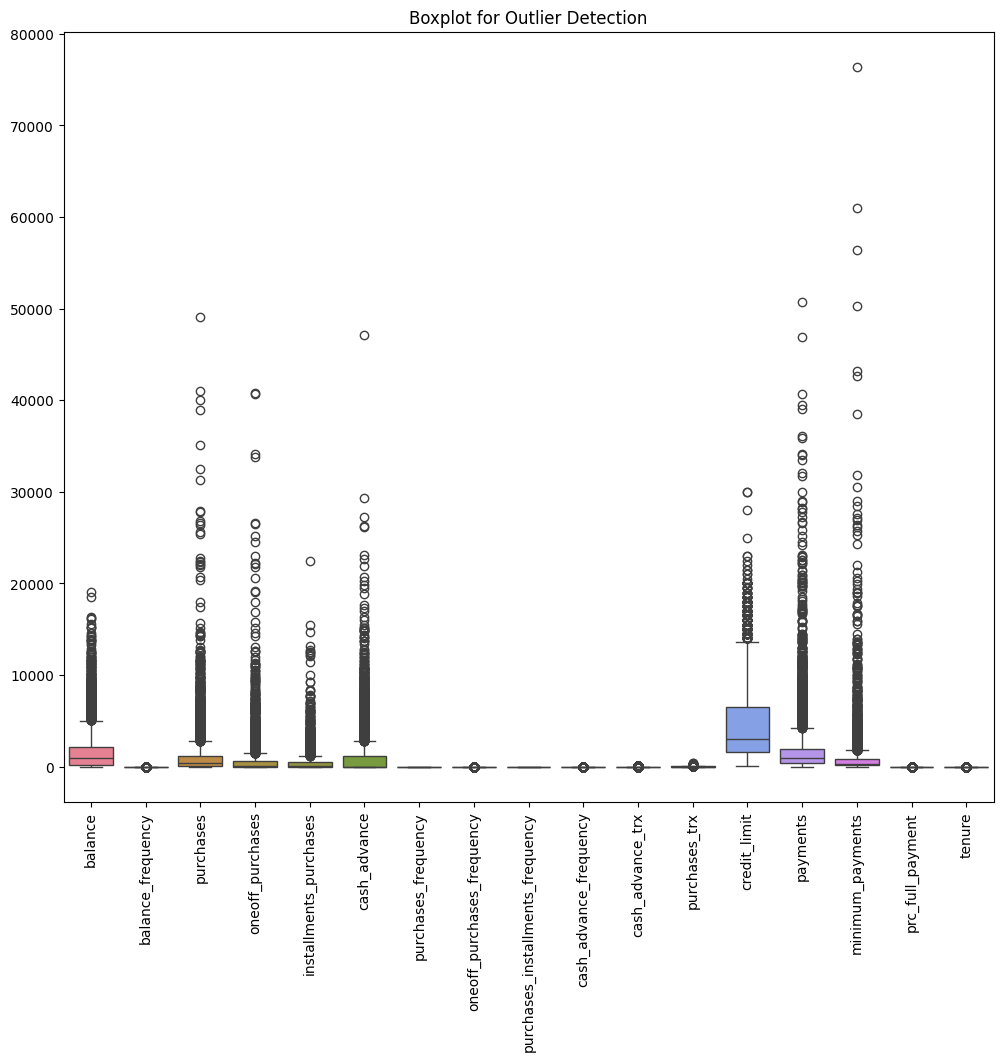

In [33]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [34]:
df[df['minimum_payments'] > 35000]

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
567,3457.086184,1.0,2448.60,0.0,2448.60,0.000000,1.0,0.0,1.0,0.000000,0,12,1700.0,227.514473,38512.12477,0.0,6
4376,10571.411070,1.0,7739.48,0.0,7739.48,0.000000,1.0,0.0,1.0,0.000000,0,44,8000.0,2688.447014,76406.20752,0.0,6
4462,4976.028578,1.0,900.87,0.0,900.87,0.000000,1.0,0.0,1.0,0.000000,0,162,5500.0,92.865469,50260.75947,0.0,6
5657,4628.109931,1.0,912.54,0.0,912.54,0.000000,1.0,0.0,1.0,0.000000,0,21,5000.0,3746.305759,56370.04117,0.0,6
5830,8038.893195,1.0,0.00,0.0,0.00,197.915586,0.0,0.0,0.0,0.166667,8,0,9000.0,3569.182969,43132.72823,0.0,6
5968,6022.224462,1.0,0.00,0.0,0.00,4111.465632,0.0,0.0,0.0,0.166667,6,0,7000.0,4560.775720,42629.55117,0.0,6
7132,9024.812044,1.0,0.00,0.0,0.00,2750.442399,0.0,0.0,0.0,0.083333,2,0,9000.0,302.484224,61031.61860,0.0,6


Winsorization

In [35]:
# Step 2: Winsorize to cap extreme values
df['purchases'] = np.clip(df['purchases'], None, 10000)
df['balance'] = np.clip(df['balance'], None, 15000)
df['cash_advance'] = np.clip(df['cash_advance'], None, 25000)
df['payments'] = np.clip(df['payments'], None, 30000)
df['minimum_payments'] = np.clip(df['minimum_payments'], None, 35000)

In [43]:
# Create a copy of the original DataFrame to keep all columns
df_winsorized = df.copy()

# Apply winsorization (clipping) to specific columns
df_winsorized['purchases'] = np.clip(df['purchases'], None, 10000)
df_winsorized['balance'] = np.clip(df['balance'], None, 15000)
df_winsorized['cash_advance'] = np.clip(df['cash_advance'], None, 25000)
df_winsorized['payments'] = np.clip(df['payments'], None, 30000)
df_winsorized['minimum_payments'] = np.clip(df['minimum_payments'], None, 35000)

# Verify the changes by displaying a few rows
df_winsorized.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,6
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,6
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,6
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,6
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,6


Standardize

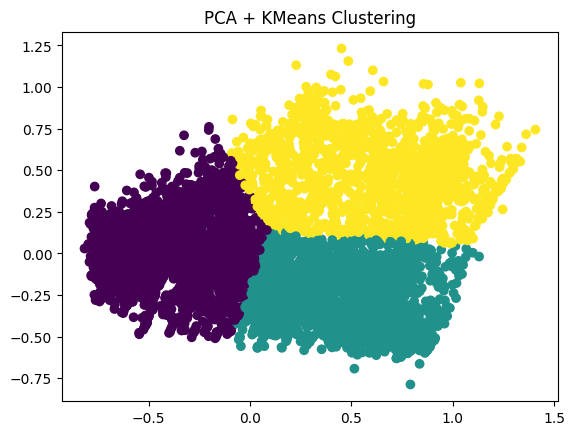

In [46]:
# Scale the data to handle the further outliers
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_winsorized)

# Dimensionality Reduction (PCA)
pca = PCA(n_components=2)  # Choose number of components based on explained variance
df_pca = pca.fit_transform(df_scaled)

# Apply Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Visualize Clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters)
plt.title('PCA + KMeans Clustering')
plt.show()

In [48]:
df_winsorized.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1599.787945,0.895035,965.454301,604.901438,420.843533,990.565222,0.496000,0.205909,0.368820,0.137426,3.313918,15.033233,4522.091030,1773.585930,850.022517,0.159304,5.534391
std,2085.430994,0.207697,1593.516920,1684.307803,917.245182,2065.763214,0.401273,0.300054,0.398093,0.200905,6.912506,25.180468,3659.240379,2778.857830,2069.048159,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,0.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,6.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,6.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,6.000000
max,15000.000000,1.000000,10000.000000,40761.250000,22500.000000,25000.000000,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,30000.000000,35000.000000,1.000000,6.000000


## Part 2 - Exploratory Data Analysis

Looking to discover the types of outliers and potential credit card customer behaviours we can segment


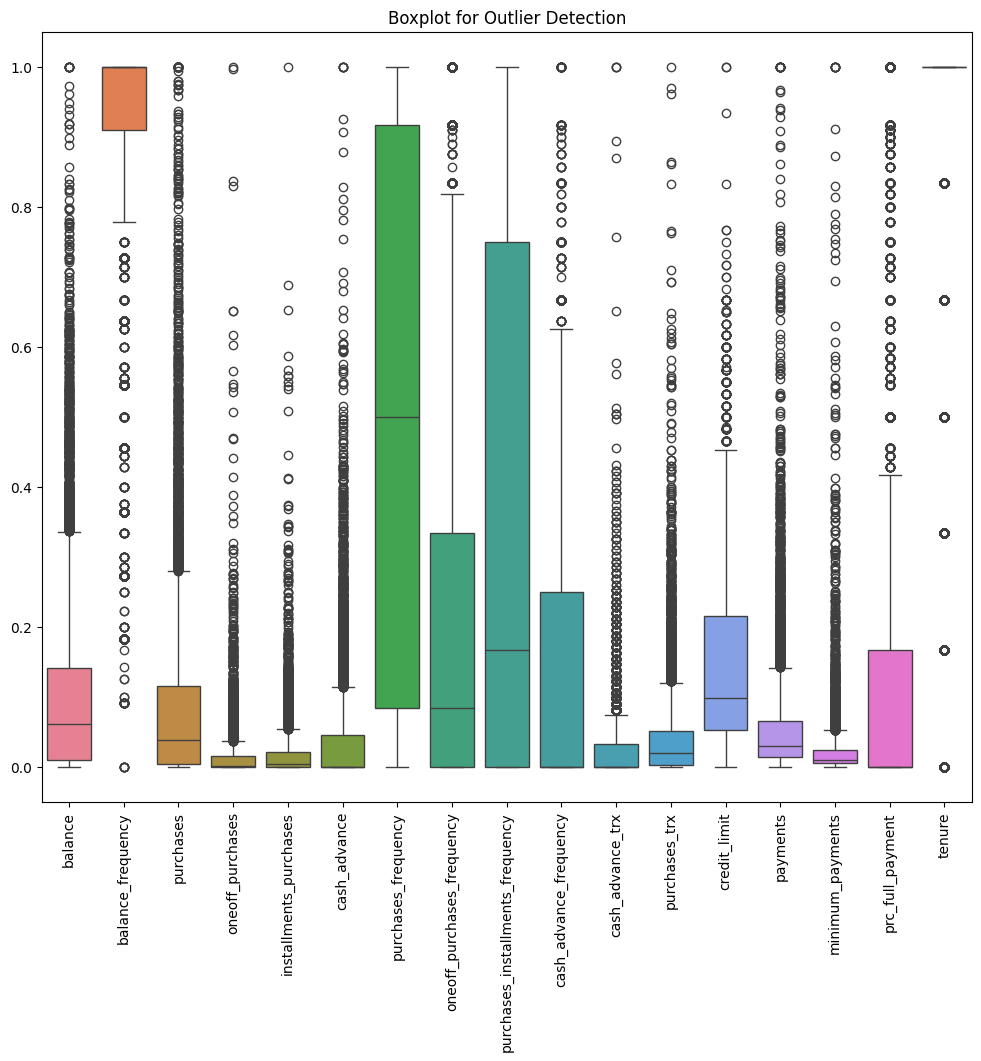

In [50]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 10))
sns.boxplot(data=df_scaled)
plt.xticks(ticks=range(len(df.columns)), labels=df.columns, rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


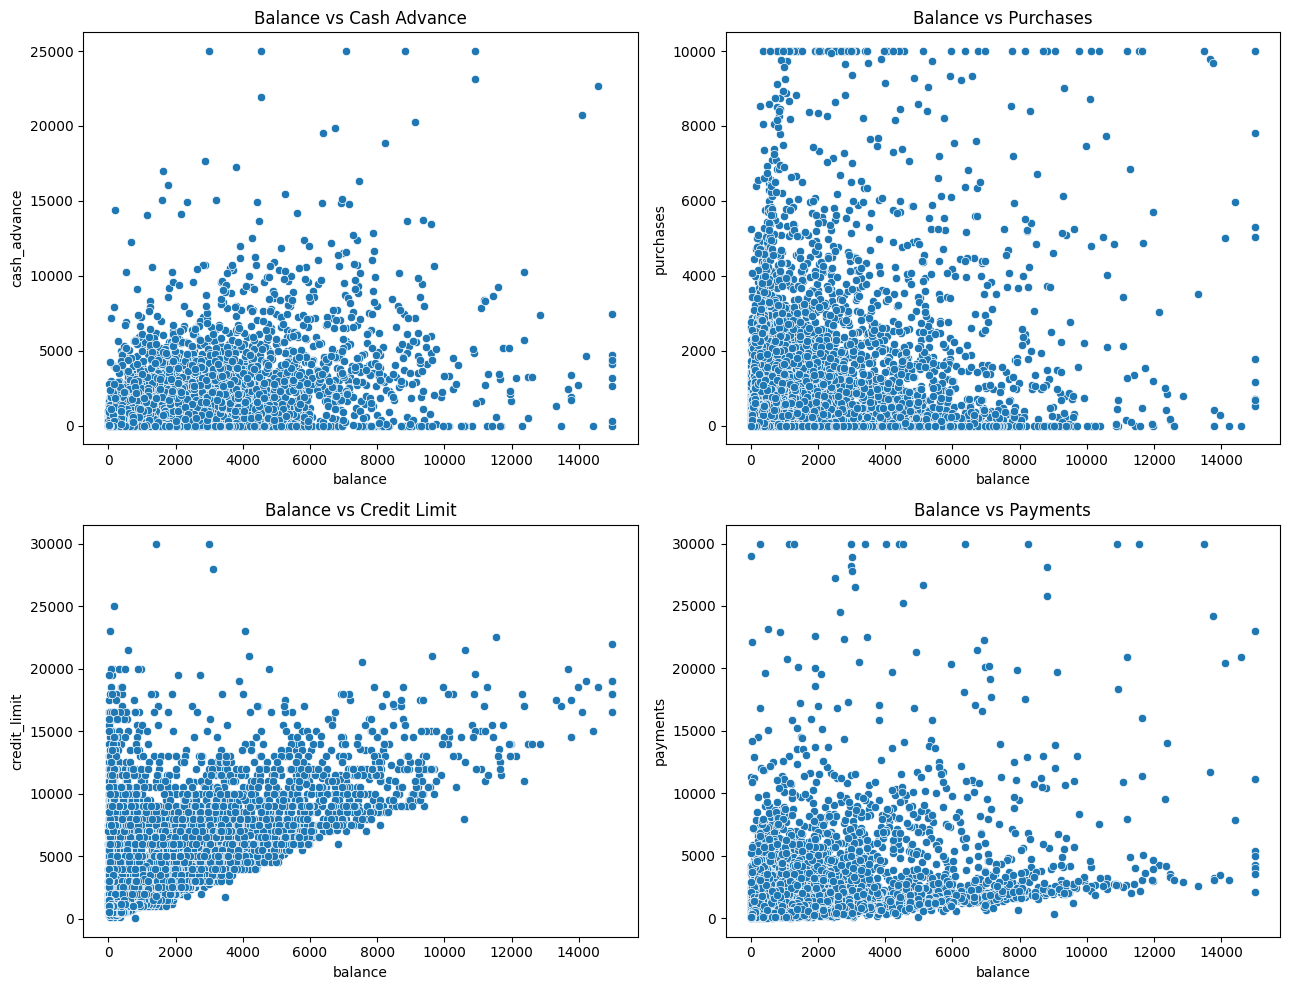

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the relationship between balance and other variables - Outliers have been winsorized
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

# Flatten the axes to make it easier to iterate
axes = axes.flatten()

sns.scatterplot(x=df_winsorized['balance'], y=df_winsorized['cash_advance'], ax=axes[0])
sns.scatterplot(x=df_winsorized['balance'], y=df_winsorized['purchases'], ax=axes[1])
sns.scatterplot(x=df_winsorized['balance'], y=df_winsorized['credit_limit'], ax=axes[2])
sns.scatterplot(x=df_winsorized['balance'], y=df_winsorized['payments'], ax=axes[3])

# Titles for each subplot
axes[0].set_title("Balance vs Cash Advance")
axes[1].set_title("Balance vs Purchases")
axes[2].set_title("Balance vs Credit Limit")
axes[3].set_title("Balance vs Payments")

plt.tight_layout()
plt.show()

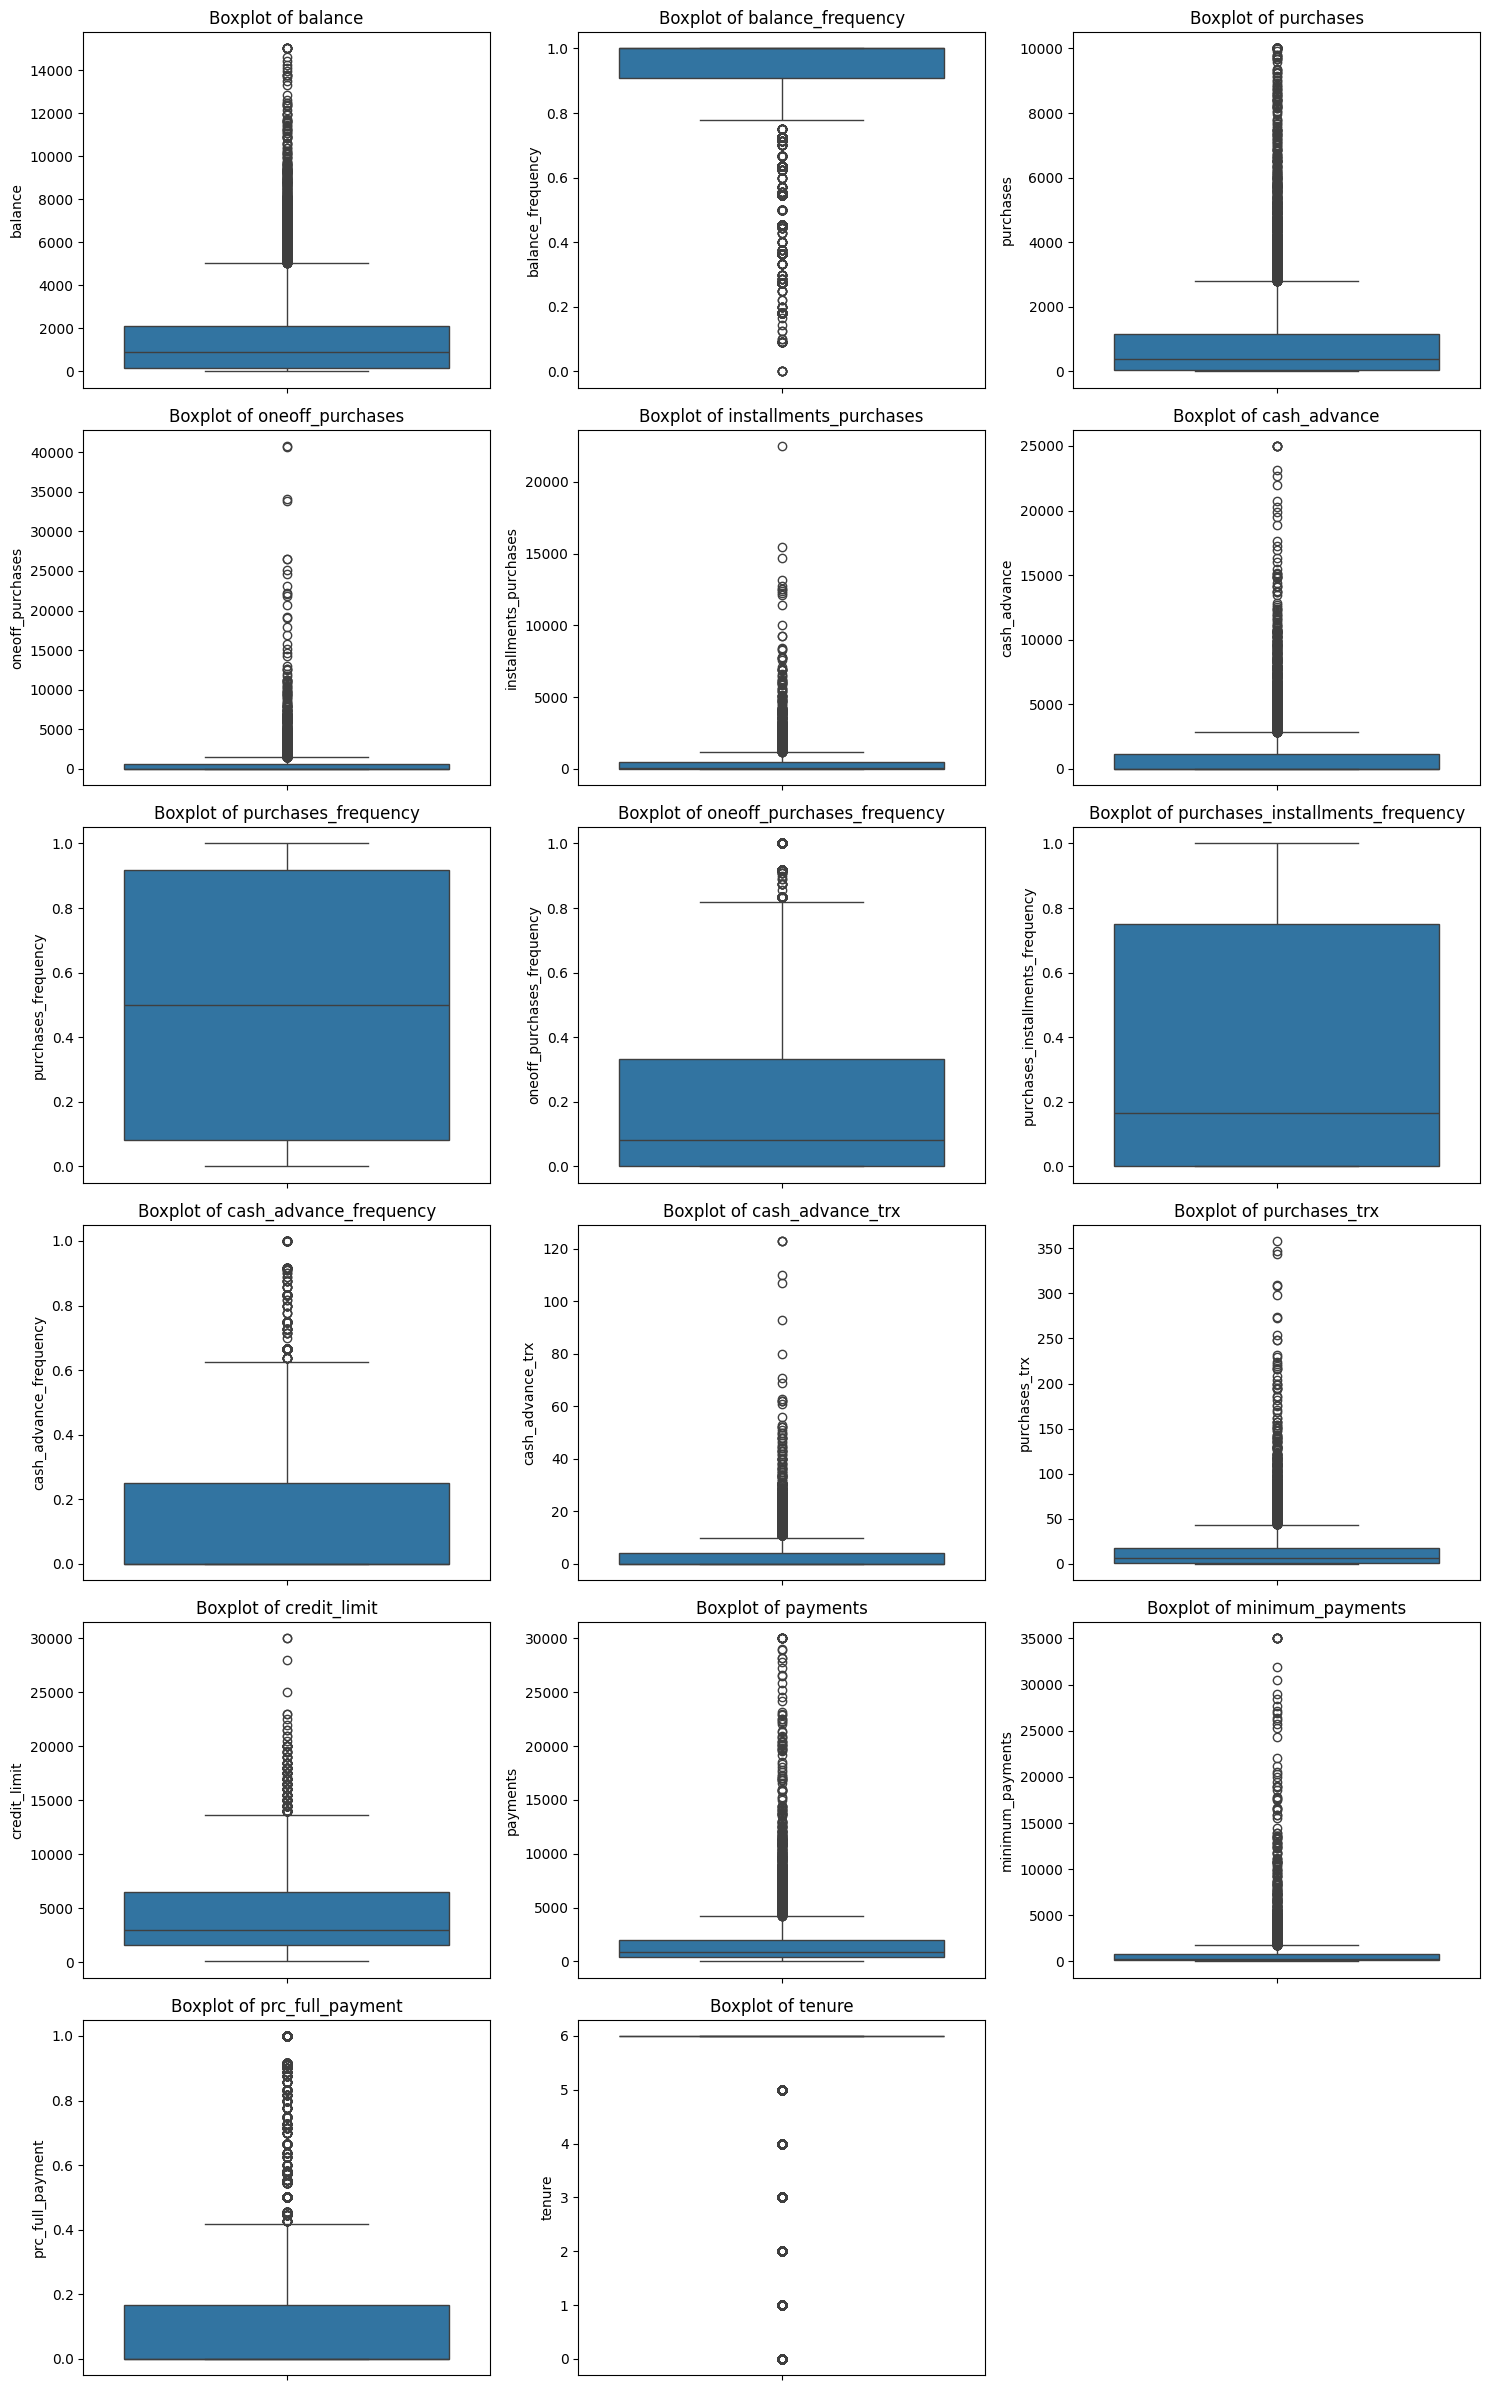

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of features and set up the plot grid
num_features = len(df_winsorized.columns)
num_cols = 3  # Number of columns for the grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes for easy iteration, in case it's a 2D array
axes = axes.flatten()

# Create a boxplot for each feature
for i, col in enumerate(df_winsorized.columns):
    sns.boxplot(data=df_winsorized[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

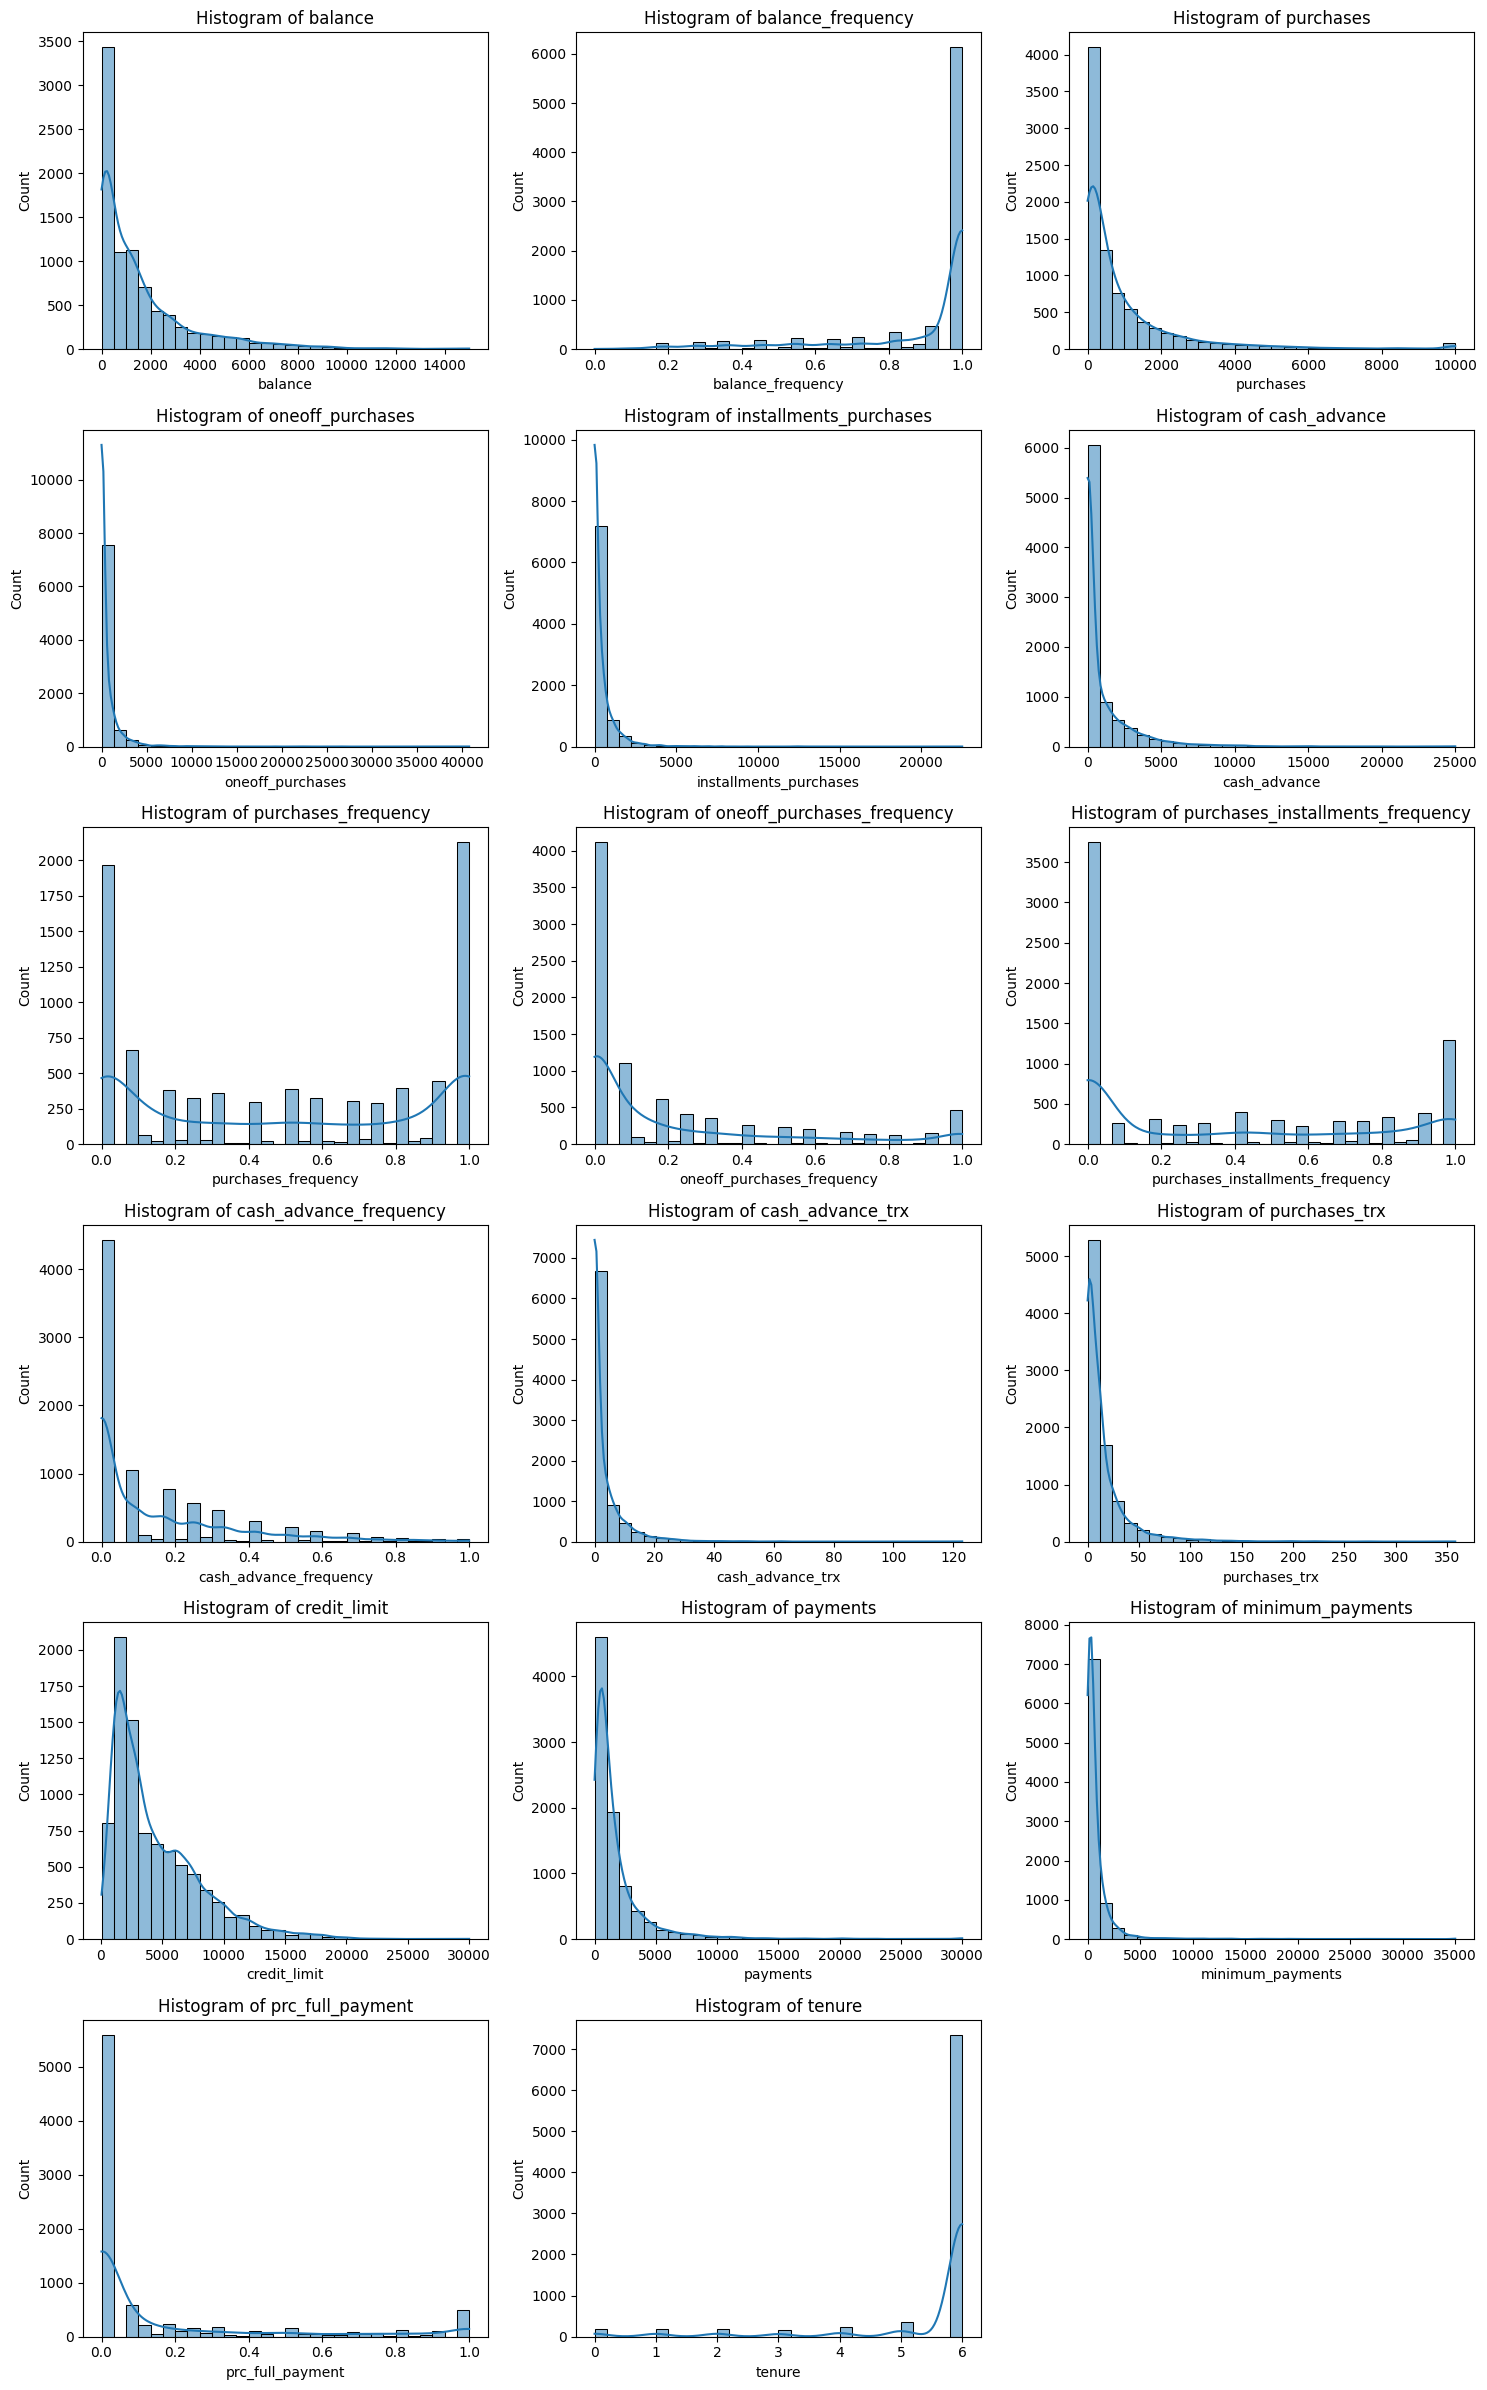

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of features and set up the plot grid
num_features = len(df_winsorized.columns)
num_cols = 3  # Number of columns for the grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes for easy iteration, in case it's a 2D array
axes = axes.flatten()

# Create a histogram for each feature
for i, col in enumerate(df_winsorized.columns):
    sns.histplot(df_winsorized[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## PART 3 - CLUSTERING ALGORITHMS

- Implement at least three different clustering algorithms of your choice (e.g., K-Means, Hierarchical, DBSCAN). You can try any algorithms available in sklearn.
- Use Elbow method, Silhouette analysis, or other techniques to determine the optimal number of clusters.
- Discuss each method, and select the most appropriate

K-MEANS: OPTIMIZATION

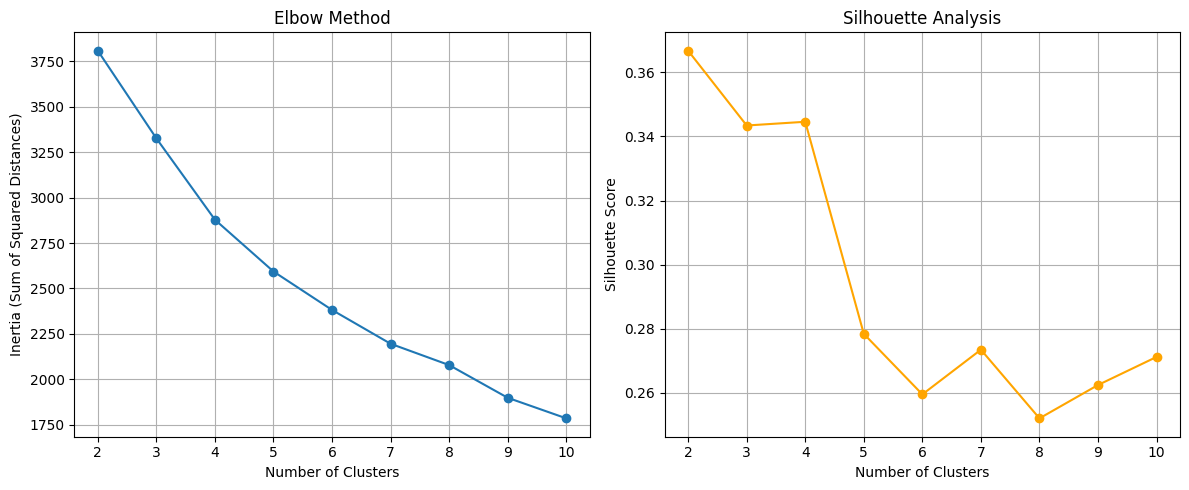

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method and Silhouette Analysis for K-Means
range_n_clusters = range(2, 11)  # Range of clusters to evaluate
inertia = []  # To store the sum of squared distances for the Elbow method
silhouette_scores = []  # To store silhouette scores

for n_clusters in range_n_clusters:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)  # Fit the model to the data
    
    # Elbow method
    inertia.append(kmeans.inertia_)
    
    # Silhouette analysis
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.grid(True)

# Plot Silhouette Analysis
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Analysis")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()

K-MEANS MODELS

Silhouette Score for KMeans with 3 Clusters: 0.343


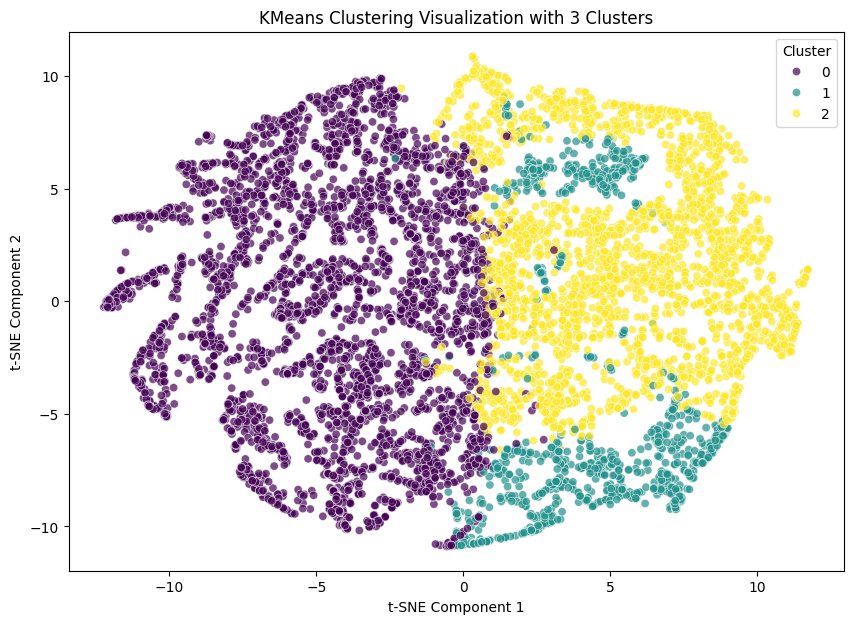

In [72]:
# Using MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the optimal number of clusters (choose based on your analysis)
optimal_clusters = 3  # or 4, depending on your interpretation

# Step 2: Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Step 3: Calculate and print the Silhouette Score
silhouette_avg = silhouette_score(df_scaled, kmeans_labels)
print(f"Silhouette Score for KMeans with {optimal_clusters} Clusters: {silhouette_avg:.3f}")

# Step 4: Perform t-SNE on the scaled data to reduce to 2D for visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_data = tsne.fit_transform(df_scaled)

# Step 5: Visualization using t-SNE
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=kmeans_labels, palette='viridis', alpha=0.7)
plt.title(f'KMeans Clustering Visualization with {optimal_clusters} Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

Silhouette Score for Optimized KMeans Clustering: 0.26577221290206454


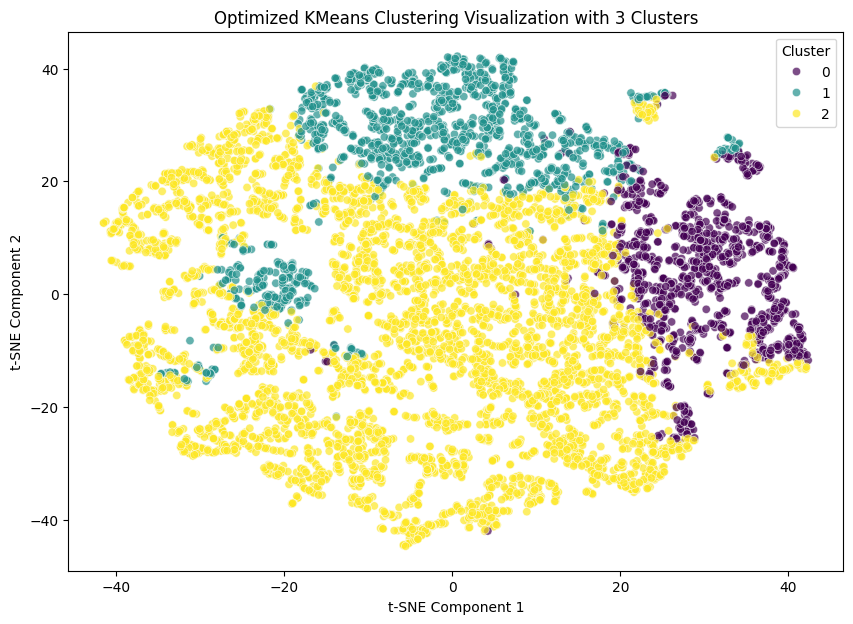

In [69]:
# Using Standard Scaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Scale the Data using StandardScaler
scaler = StandardScaler()
scaled_data2 = scaler.fit_transform(df)

# Step 2: Apply PCA to reduce dimensions before KMeans (optional but recommended)
pca = PCA(n_components=10)  # Choose the number of components based on explained variance
pca_data = pca.fit_transform(scaled_data2)

# Step 3: Define the optimal number of clusters and fit KMeans
optimal_clusters = 3  # Adjust based on your findings
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, max_iter=500, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)

# Step 4: Calculate and display the Silhouette Score
silhouette_avg = silhouette_score(pca_data, kmeans_labels)
print(f"Silhouette Score for Optimized KMeans Clustering: {silhouette_avg}")

# Step 5: Perform t-SNE on the PCA data to reduce to 2D for visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
tsne_data = tsne.fit_transform(pca_data)

# Step 6: Visualization using t-SNE
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=kmeans_labels, palette='viridis', alpha=0.7)
plt.title(f'Optimized KMeans Clustering Visualization with {optimal_clusters} Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

Silhouette Score for KMeans with RobustScaler: 0.5126862771667798


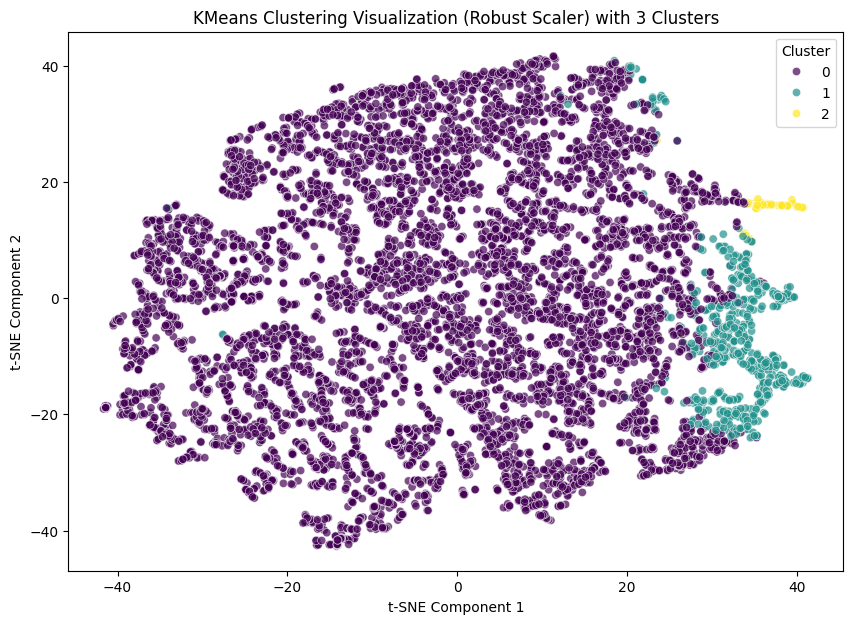

In [71]:
# Using Robust Scaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Scale the Data using RobustScaler
scaler = RobustScaler()
scaled_data3= scaler.fit_transform(df)

# Step 2: Define the optimal number of clusters and fit KMeans
optimal_clusters = 3  # Adjust based on your findings from Elbow or Silhouette Analysis
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, max_iter=500, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data3)

# Step 3: Calculate and display the Silhouette Score
silhouette_avg = silhouette_score(scaled_data3, kmeans_labels)
print(f"Silhouette Score for KMeans with RobustScaler: {silhouette_avg}")

# Step 4: Perform t-SNE on the scaled data to reduce to 2D for visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
tsne_data = tsne.fit_transform(scaled_data3)

# Step 5: Visualization using t-SNE
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=kmeans_labels, palette='viridis', alpha=0.7)
plt.title(f'KMeans Clustering Visualization (Robust Scaler) with {optimal_clusters} Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()